In [2]:
# Loading necessary packages
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import json

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup

# Part 1

In [3]:
url = "https://ies-midterm.soulution.rocks/"

In [4]:
# Requesting particular page using post and necessary json login
request = requests.post(url+"login",json={"cuni":"26749713"})
request.text
request.json()

{'data': {'personal_code': '04b93b59',
  'dataset_ids': ['8a310226b3',
   '779ce2818b',
   '24f88cb68c',
   '775352ba11',
   'ce92a7afca',
   '8c34bdfc03',
   'f894683be9',
   'dabd98d224',
   '40bb66faec']},
 'message': 'Hello, Kořínek Matěj, Bc! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [6]:
# Printing the personal code
print(request.json()["data"]["personal_code"])

04b93b59


In [7]:
# Saving codes for datasets
codes = request.json()["data"]["dataset_ids"]
print(codes)

['8a310226b3', '779ce2818b', '24f88cb68c', '775352ba11', 'ce92a7afca', '8c34bdfc03', 'f894683be9', 'dabd98d224', '40bb66faec']


In [19]:
# Sending requets to load data
bad_req = "Error" # for checking error
datasets = []
for i in codes:
    good = False # while loop until we load the dataset
    while not good:
        req = requests.get(f"{url}data/{i}")
        data = req.json() # getting data
        if data["message"][:5] == bad_req: # checking the messages
            continue 
        else:
            datasets.append(data) # appending data
            good = True

# Part 2

'Columns are in order Date,Open,High,Low,Close,Adj.Close,Volume. Make sure your data are ordered.

In [23]:
# checking one dataset
datasets[0]#["data"]

{'data': {'company': 'DGE',
  'data': [['2019-01-02',
    '839.27001953125',
    '856.6900024414062',
    '838.7999877929688',
    '851.7000122070312',
    '851.7000122070312',
    '0'],
   ['2019-01-03',
    '850.0',
    '853.2000122070312',
    '836.3800048828125',
    '837.5399780273438',
    '837.5399780273438',
    '0'],
   ['2019-01-04',
    '848.3800048828125',
    '869.6900024414062',
    '848.3800048828125',
    '869.0599975585938',
    '869.0599975585938',
    '0'],
   ['2019-01-07',
    '870.52001953125',
    '898.7999877929688',
    '868.0499877929688',
    '898.739990234375',
    '898.739990234375',
    '0'],
   ['2019-01-08',
    '906.7999877929688',
    '909.969970703125',
    '892.9000244140625',
    '904.3499755859375',
    '904.3499755859375',
    '0'],
   ['2019-01-09',
    '905.0399780273438',
    '906.47998046875',
    '898.1300048828125',
    '902.010009765625',
    '902.010009765625',
    '0'],
   ['2019-01-10',
    '899.02001953125',
    '906.9000244140625',
   

In [99]:
pd_dataset = [] # list for pd.dataframes

for data in datasets: # loop through json data
    # crating pandas
    df_data = pd.DataFrame(data["data"]['data'], 
                           columns=["Date","Open","High","Low","Close","Adj.Close","Volume"])
    # adding name
    df_data["company"] = data["data"]['company']
    # appending to list
    pd_dataset.append(df_data)

In [64]:
pd_dataset[0].head()

,Date,Open,High,Low,Close,Adj.Close,Volume,company
0,2019-01-02,839.27001953125,856.6900024414062,838.7999877929688,851.7000122070312,851.7000122070312,0,DGE
1,2019-01-03,850.0,853.2000122070312,836.3800048828125,837.5399780273438,837.5399780273438,0,DGE
2,2019-01-04,848.3800048828125,869.6900024414062,848.3800048828125,869.0599975585938,869.0599975585938,0,DGE
3,2019-01-07,870.52001953125,898.7999877929688,868.0499877929688,898.739990234375,898.739990234375,0,DGE
4,2019-01-08,906.7999877929688,909.969970703125,892.9000244140625,904.3499755859375,904.3499755859375,0,DGE


In [100]:
# dividing first dataset
pd_dataset[0].set_index("Date", inplace=True)

open_df = pd_dataset[0][["Open"]]
high_df = pd_dataset[0][["High"]]
low_df = pd_dataset[0][["Low"]]
close_df = pd_dataset[0][["Close"]]
adjust_df = pd_dataset[0][["Adj.Close"]]
volume_df = pd_dataset[0][["Volume"]]

In [101]:
names = [pd_dataset[0]["company"].iloc[0]]
i = 1

for data in pd_dataset[1:]: # joining rest of datasets
    data.set_index("Date", inplace=True)
    names.append(data["company"].iloc[0])
    
    open_df = open_df.join(data.Open, how="outer", rsuffix=f"_{i}")
    high_df = high_df.join(data.High, how="outer", rsuffix=f"_{i}")
    low_df = low_df.join(data.Low, how="outer", rsuffix=f"_{i}")
    close_df = close_df.join(data.Close, how="outer", rsuffix=f"_{i}")
    adjust_df = adjust_df.join(data["Adj.Close"], how="outer", rsuffix=f"_{i}")
    volume_df = volume_df.join(data.Volume, how="outer", rsuffix=f"_{i}")
    i += 1

In [102]:
# renaming columns
open_df.columns = names
high_df.columns = names
low_df.columns = names
close_df.columns = names
adjust_df.columns = names
volume_df.columns = names

In [103]:
# it is working
high_df

,DGE,POLY,PSN,SMIN,PRU,IHG,RTO,SKG,GSK
Date,,,,,,,,,
,None,None,None,None,None,None,None,None,None
2019-01-02,856.6900024414062,NaN,NaN,38.560001373291016,83.19000244140625,56.902000427246094,NaN,16272.7001953125,38.11000061035156
2019-01-03,853.2000122070312,NaN,NaN,37.97999954223633,83.04000091552734,56.31190872192383,NaN,15909.099609375,38.290000915527344
2019-01-04,869.6900024414062,NaN,NaN,38.97999954223633,85.30999755859375,57.776607513427734,NaN,15727.2998046875,38.709999084472656
2019-01-07,898.7999877929688,NaN,NaN,38.83000183105469,86.2300033569336,57.24973678588867,NaN,15454.5,38.9900016784668
...,...,...,...,...,...,...,...,...,...
2020-11-16,956.3300170898438,9.960000038146973,34.16999816894531,37.380001068115234,75.91999816894531,62.38999938964844,NaN,9620.0,38.540000915527344
2020-11-17,960.7999877929688,9.880000114440918,34.02000045776367,37.54999923706055,75.81999969482422,62.04999923706055,NaN,9550.0,37.5
2020-11-18,966.1500244140625,9.829999923706055,33.95000076293945,37.900001525878906,77.55999755859375,61.72999954223633,NaN,10200.0,37.349998474121094


## task 1

In [108]:
print(open_df.index[1])
print(open_df.index[-1])

2019-01-02
2020-11-20


yes, the dataset is in the specified time range

## task 2

In [122]:
volume_df.head()

,DGE,POLY,PSN,SMIN,PRU,IHG,RTO,SKG,GSK
Date,,,,,,,,,
,None,None,None,None,None,None,None,None,None
2019-01-02,0,NaN,NaN,10100,2247700,179300,NaN,196119,2381700
2019-01-03,0,NaN,NaN,28200,2257500,114300,NaN,365684,2756700
2019-01-04,0,NaN,NaN,19500,2503900,85100,NaN,203456,2960400
2019-01-07,0,NaN,NaN,94600,2356400,156900,NaN,178541,3403400


In [125]:
volume_df = volume_df.fillna(0)

In [148]:
volume_df.iloc[0][0]

'0'

In [150]:
volume_df = volume_df.astype(float)

In [176]:
for col in loss.columns:
    highest = volume_df[col].argmax()
    print(f"company {col} highest volume was day {loss.index[highest]}")

company DGE highest volume was day 
company POLY highest volume was day 2020-06-25
company PSN highest volume was day 2019-05-07
company SMIN highest volume was day 2020-04-15
company PRU highest volume was day 2020-06-25
company IHG highest volume was day 2020-03-25
company RTO highest volume was day 
company SKG highest volume was day 2020-04-22
company GSK highest volume was day 2020-02-27


## Task 3

In [155]:
open_df = open_df.astype(float)
close_df = close_df.astype(float)

In [156]:
loss = np.log(open_df) - np.log(close_df)

In [158]:
for col in loss.columns:
    highest = loss[col].argmax()
    print(f"company {col} highest loss was day {loss.index[highest]}")

company DGE highest loss was day 2020-03-16
company POLY highest loss was day 2020-07-06
company PSN highest loss was day 2020-03-18
company SMIN highest loss was day 2020-03-12
company PRU highest loss was day 2020-03-12
company IHG highest loss was day 2020-04-07
company RTO highest loss was day 2020-01-24
company SKG highest loss was day 2020-06-11
company GSK highest loss was day 2020-06-11


## Task 4 - lowest and highest adj price

In [160]:
adjust_df = adjust_df.astype(float)

In [161]:
for col in loss.columns:
    highest = adjust_df[col].max()
    lowest = adjust_df[col].min()
    print(f"company {col} highest: {highest}, lowest: {lowest}")

company DGE highest: 1045.1099853515625, lowest: 709.1900024414062
company POLY highest: 19.0, lowest: 8.890000343322754
company PSN highest: 45.029998779296875, lowest: 25.309999465942383
company SMIN highest: 39.71310806274414, lowest: 20.77176284790039
company PRU highest: 97.5345230102539, lowest: 37.84413146972656
company IHG highest: 68.31763458251953, lowest: 27.81444549560547
company RTO highest: 1865.0, lowest: 1865.0
company SKG highest: 15863.599609375, lowest: 6990.0
company GSK highest: 45.580257415771484, lowest: 30.737220764160156


## task 5 - sum of shares

In [162]:
volume_df.sum()

DGE     0.000000e+00
POLY    6.702782e+06
PSN     1.686474e+08
SMIN    2.987400e+07
PRU     1.203267e+09
IHG     1.112703e+08
RTO     0.000000e+00
SKG     6.912971e+07
GSK     1.555416e+09
dtype: float64

Volume traded per company

## Task 6 - average volume in a week

i dont have time i would use group by and mean

## Task 7 - log ret

In [168]:
loss.max()

DGE     0.079257
POLY    0.135002
PSN     0.097069
SMIN    0.126203
PRU     0.131532
IHG     0.099772
RTO     0.000000
SKG     0.072759
GSK     0.039498
dtype: float64

In [167]:
loss.max().argmax()

1

<AxesSubplot:xlabel='Date'>

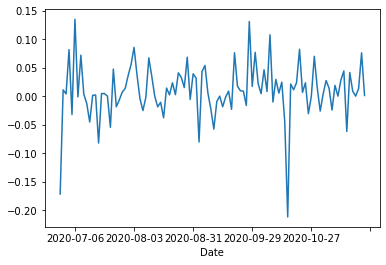

In [171]:
loss["POLY"].plot()

# task 8 - motnhly

i would again use diff function most probably

## Task 9

i would use rolling and sd functions, but no time for that :(

# task 10

<AxesSubplot:xlabel='Date'>

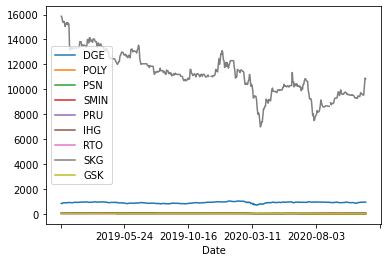

In [175]:
adjust_df.plot()